### Imports and Definitions

In [1]:
from glob import glob
from math import exp
from matplotlib import rcParams
from matplotlib.lines import Line2D
from numpy import arange, log
from os import makedirs
from scipy.stats import expon, gaussian_kde, linregress
from seaborn import distplot, set_context, set_style
import matplotlib.pyplot as plt
DATADIR = '../data'
FIGDIR = '../figs'; makedirs(FIGDIR, exist_ok=True)
RC = {"font.size":12,"axes.titlesize":16,"axes.labelsize":14,"legend.fontsize":10,"xtick.labelsize":10,"ytick.labelsize":10}
set_context("paper", rc=RC); set_style("ticks"); rcParams['font.family'] = 'serif'
rcParams['patch.edgecolor'] = '4C4C4C' # set boxenplot outlines same as violinplot
meta = {
    'color': {
        'WI21_Midterm': 'red',
        'WI21_Final': 'green',
        'SP21_Midterm': 'blue',
        'SP21_Final': 'magenta',
    },
    
    'linestyle': {
        'real': '--',
        'theoretical': '-',
    },
    
    'range': {
        'WI21_Midterm': {
            'xmin': 0.04,
            'xmax': 0.07,
        },
        
        'WI21_Final': {
            'xmin': 0.01,
            'xmax': 0.05,
        },
        
        'SP21_Midterm': {
            'xmin': 0.03,
            'xmax': 0.06,
        },
        
        'SP21_Final': {
            'xmin': 0.03,
            'xmax': 0.04,
        },
    },
    
    'label': {
        'WI21_Midterm': 'Winter 2021 Midterm',
        'WI21_Final': 'Winter 2021 Final',
        'SP21_Midterm': 'Spring 2021 Midterm',
        'SP21_Final': 'Spring 2021 Final',
    },
}
EXAMS = ['WI21_Midterm', 'WI21_Final', 'SP21_Midterm', 'SP21_Final']
XDELTA = 0.0001
XMIN = 0
XMAX = 0.23
YMIN = 10**-4
YMAX = 100

### Plot Similarity Score Distributions

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

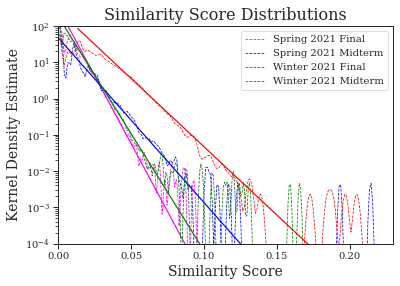

In [2]:
fig, ax = plt.subplots()
for fn in glob('%s/similarity_csv/*.csv' % DATADIR):
    exam = fn.split('/')[-1].rstrip('.csv')
    scores = [float(l.split(',')[2]) for l in open(fn)]
    distplot(scores, kde=True, hist=False, label=meta['label'][exam], color=meta['color'][exam], kde_kws={'linestyle':meta['linestyle']['real'], 'linewidth': 0.75})
    kde = gaussian_kde(scores)
    X = arange(meta['range'][exam]['xmin'], meta['range'][exam]['xmax'], XDELTA)
    Y = log(kde.pdf(X))
    line = linregress(X,Y) # y = ln(L) - Lx, where L = rate parameter (lambda) of Exponential distribution
    rate = -1 * line.slope; scale = 1. / rate
    loc = -(line.intercept - log(rate))/line.slope
    Xplot = arange(loc+XDELTA, XMAX, XDELTA)
    Yplot = expon.pdf(Xplot, loc=loc, scale=scale)
    plt.plot(Xplot, Yplot, color=meta['color'][exam], linestyle=meta['linestyle']['theoretical'])
plt.title("Similarity Score Distributions")
plt.xlabel("Similarity Score")
plt.xlim(xmin=XMIN, xmax=XMAX)
plt.ylabel("Kernel Density Estimate")
plt.ylim(ymin=YMIN, ymax=YMAX)
ax.set_yscale('log')
plt.legend()
fig.savefig('%s/similarity_dists.pdf' % FIGDIR, format='pdf', bbox_inches='tight')